In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_train = pd.read_csv(
    "./fragen/train.csv",
    encoding = 'utf-8'
)

df_test = pd.read_csv(
    "./fragen/test.csv",
    usecols= ['test_id', 'question1', 'question2'],
    encoding = 'utf-8'
)

df_validate = pd.read_csv(
    "./fragen/sample_submission.csv",
    encoding='utf-8'
)


/tmp/ipykernel_8983/2319454378.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv(


# Machine Learning Project - 
# Wiederholte Fragen
### David Brand, Max Hampel




## Aufgabenstellung


> Die Datensammlung enthält Fragen aus einem Forum. Es sind Paare aus Fragen gleichen Inhalts geboten.
>  Erstellen Sie ein tiefes Neuronales Netzwerk, dass dem Nutzer schon bei der Eingabe einer neuen Frage gleich ähnliche Fragen anbietet.
>  - Je mehr Text der Benutzer eingibt, desto präziser sollen die ähnlichen Fragen sein!


## Bereitgestellte Daten

Bereitgestellter Datensatz besteht aus:
 - README-Datei
 - Traningsdatensatz(train.csv)
 - Validierungsdatensatz(test.csv)
 - sample_submission.csv
 

### Trainingsdatensatz

In [25]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0



**Einzelne Einträge bestehen aus:**

- id: Einzigartige Nummer für den Eintrag
- qid1,qid2: Eintragene Nummer, die für jede Frage einzigartig
- question1,question 2: Tatsächlicher Text der jeweiligen Frage
- is_duplicate: Sind beide Fragen miteinander verwandt, oder nicht?
    - 0: nicht verwandt
    - 1: verwandt
 

**Verteilung der Klassen:**


Text(0.5, 1.0, 'Number of elements found in dataset')

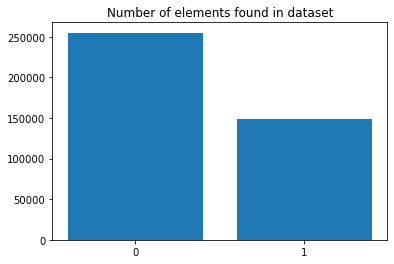

In [26]:
fig, ax = plt.subplots()
label_dist = df_train.is_duplicate.value_counts()

ax.bar([0,1],label_dist)
ax.set_xticks([0,1], labels=[0,1])
ax.set_title('Number of elements found in dataset')

### Testdatensatz


In [27]:
df_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


## sample_submission.csv

In [28]:
df_validate.head()

,test_id,is_duplicate
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


## Zusammenfügen zum Testdatensatz

In [9]:
test_data_raw = pd.read_csv(
    "./fragen/test.csv",
    usecols= ['test_id', 'question1', 'question2'],
    encoding='utf-8'
)

test_data_raw = test_data_raw.applymap(lambda s: s.lower() if type(s) == str else s)
test_data_raw.dropna(inplace=True)

submission_data_raw = pd.read_csv(
    "./fragen/sample_submission.csv",
    usecols = ['test_id', 'is_duplicate']
)

submission_data_raw.dropna(inplace=True)
submission_data_raw.head()

test_data_merged_raw = test_data_raw.merge(submission_data_raw, left_on="test_id", right_on="test_id")

test_data_merged_raw.dropna(inplace=True)
test_data_merged_raw.drop_duplicates(inplace=True)

h1=test_data_merged_raw.is_duplicate.value_counts()
label_dist = np.array(0,h1)

test_data_merged_raw.head()

/tmp/ipykernel_8983/1790988487.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data_raw = pd.read_csv(


,test_id,question1,question2,is_duplicate
0,0,how does the surface pro himself 4 compare wit...,why did microsoft choose core m3 and not core ...,1
1,1,should i have a hair transplant at age 24? how...,how much cost does hair transplant require?,1
2,2,what but is the best way to send money from ch...,what you send money to china?,1
3,3,which food not emulsifiers?,what foods fibre?,1
4,4,"how ""aberystwyth"" start reading?",how their can i start reading?,1


Text(0.5, 1.0, 'Number of elements found in dataset')

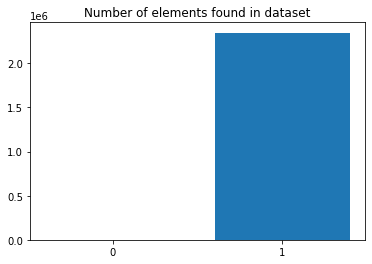

In [38]:
fig, ax = plt.subplots()

ax.bar([1,0],label_dist)
ax.set_xticks([0,1], labels=[0,1])
ax.set_title('Number of elements found in dataset')


## Idee für das Modell

1. Erstellen eines Modells, dass zwei Fragen bekommt und vorhersagen kann, wie ähnlich sie sind.
    - Training: Input sind question1 und question 2, sowie is duplicate.
    - Spätere Vorhersage: Eingegebener Text des Users und Iterrieren über Datensatz, um möglichst ähnliche Fragen zu finden.
2. Bauen einer Website:
    - User kann seine Frage eingeben
    - bekommt gematchte Fragen angezeigt und kann Frage anpassen 

## Preprocessing

1. Auswählen der relvanten Spalten:
    - Training: question1, question2, is_duplicate
    - Test: test_id, question1, question2, is_duplicate
2. Droppen aller Spalten mit NaN-Werten
3. Droppen aller Duplikate  
-> Beides trägt nicht zur Verbessserung bei  
4. Abspalten der is_duplicate Werte in beiden Datensaätzen in getrennte Variablen  
5. Abspalten von 20% der Trainingsdaten als Validierungsdaten

## Modell

1. Erstellen eines Tokenizers
2. Kodierung + Anpassen der Form der Fragen
3. Erstellen eines Dictionaries, das später zum finden ähnlicher Fragen genutzt wird
4. Erstellen des Tatsächlichen Modells
    1. Erstellung eines vorgefertigten GloVe Models für die Embedding Layer
       Dient dazu, um die einzelnen Wort in den Fragen vorzugewichten 
    2. 

## Ergebnisse

## Learnings




## Ideen für das nächste Mal

- Anhand des gewonnen Modells könnte man einen Text-Gen aufbauen, um mit diesem dann ähnliche Fragen zu detektieren.